<a href="https://colab.research.google.com/github/G-Conard/ds595-final-project/blob/main/FeatureEngineeringandDataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as py
import random
import torch
import torch.optim as optim
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import concurrent.futures
from tabulate import tabulate
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import FastICA
from numpy import savetxt
from numpy import loadtxt
import datetime
import torch
import torch.optim as optim
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.base import clone
import csv

import warnings


torch.manual_seed(50) # this makes results reproducable

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#this is a check to see if a GPU machine that pytorch can use for training
if torch.cuda.is_available():
    print('CUDA available')
    print(torch.cuda.get_device_name(0))
else:
    print('CUDA *not* available')

CUDA *not* available


In [88]:
!pip install pandas
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/G-Conard/ds595-final-project/main/weather_stations_data.csv')


In [89]:

raw_data = data.dropna() #use this raw_data var to act as the raw dataset once imported please

print(raw_data.head())

        id  station_id  tempc  humidity  dewptc  windchillc  winddir  \
0  22954.0         3.0  35.11      56.0   25.00       35.11    295.0   
1  22956.0         3.0  35.50      57.0   25.72       35.50    217.0   
2  22958.0         3.0  35.50      56.0   25.39       35.50    236.0   
3  22960.0         3.0  34.61      56.0   24.61       34.61    276.0   
4  22962.0         3.0  33.78      57.0   24.11       33.78    242.0   

   windspeedkmh  windgustkmh  rainmm  ...   UV  indoortempc  indoorhumidity  \
0          5.76         9.37     0.0  ...  0.0        36.39            51.0   
1          3.60         7.19     0.0  ...  0.0        36.28            53.0   
2          5.76         9.37     0.0  ...  0.0        36.22            54.0   
3          2.88         7.19     0.0  ...  0.0        36.11            51.0   
4          1.80         7.19     0.0  ...  0.0        35.78            52.0   

   absbarohpa  barohpa  rad_tempc  rad_hum  aqpm25  heat_index       timestamp  
0     1010.

In [90]:
#Drop identifiers and indoor data
raw_data = raw_data.drop(['id', 'station_id', 'timestamp', 'indoortempc', 'indoorhumidity'], axis=1)
print(raw_data.head())

   tempc  humidity  dewptc  windchillc  winddir  windspeedkmh  windgustkmh  \
0  35.11      56.0   25.00       35.11    295.0          5.76         9.37   
1  35.50      57.0   25.72       35.50    217.0          3.60         7.19   
2  35.50      56.0   25.39       35.50    236.0          5.76         9.37   
3  34.61      56.0   24.61       34.61    276.0          2.88         7.19   
4  33.78      57.0   24.11       33.78    242.0          1.80         7.19   

   rainmm  dailyrainmm  weeklyrainmm  monthlyrainmm  yearlyrainmm  \
0     0.0         0.79          0.79          24.21          25.7   
1     0.0         0.79          0.79          24.21          25.7   
2     0.0         0.79          0.79          24.21          25.7   
3     0.0         0.79          0.79          24.21          25.7   
4     0.0         0.79          0.79          24.21          25.7   

   solarradiation   UV  absbarohpa  barohpa  rad_tempc  rad_hum  aqpm25  \
0          425.63  0.0     1010.30  1010.

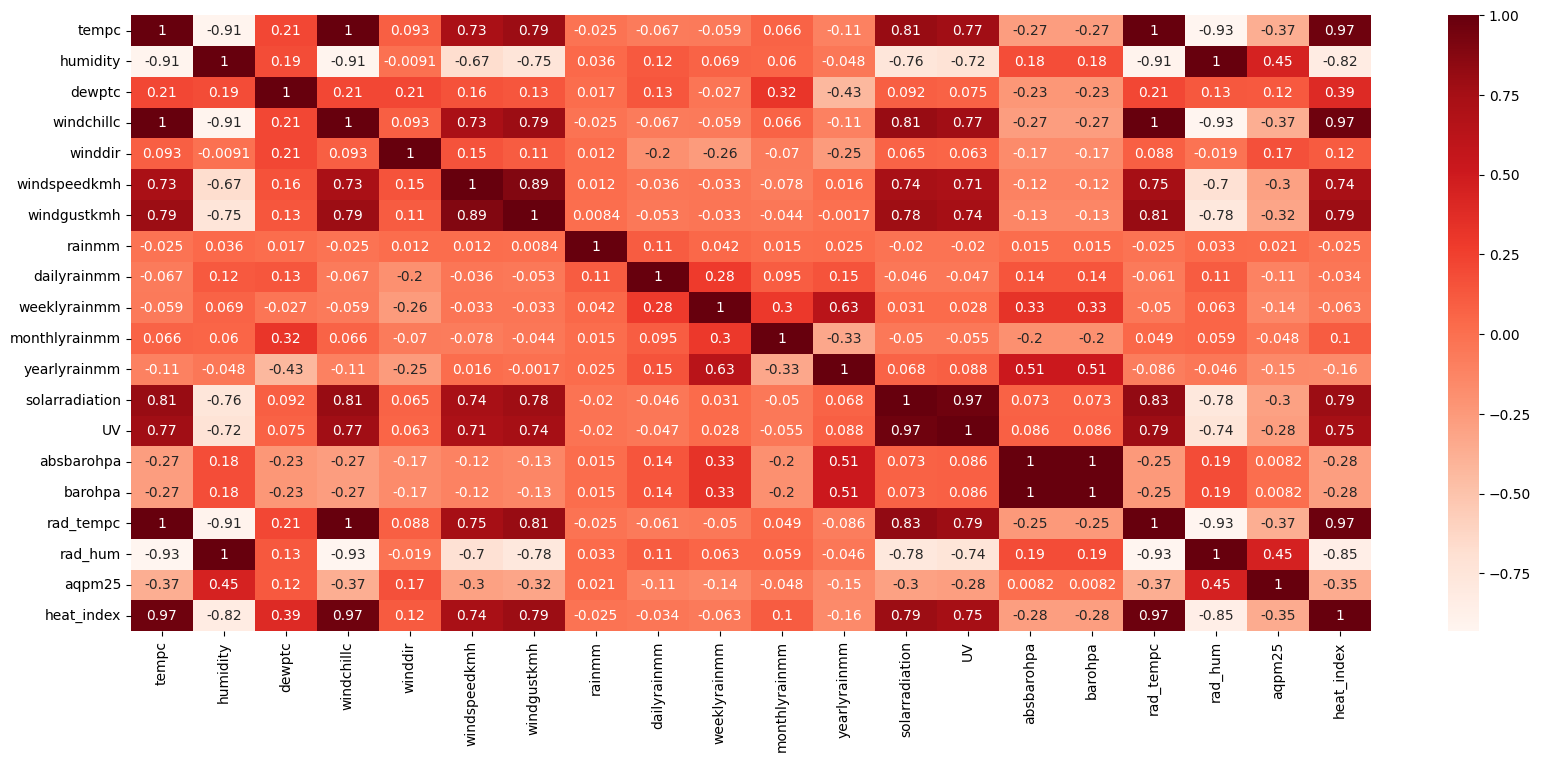

In [61]:
#Heat Map
plt.figure(figsize=(20,8))
cor = raw_data.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

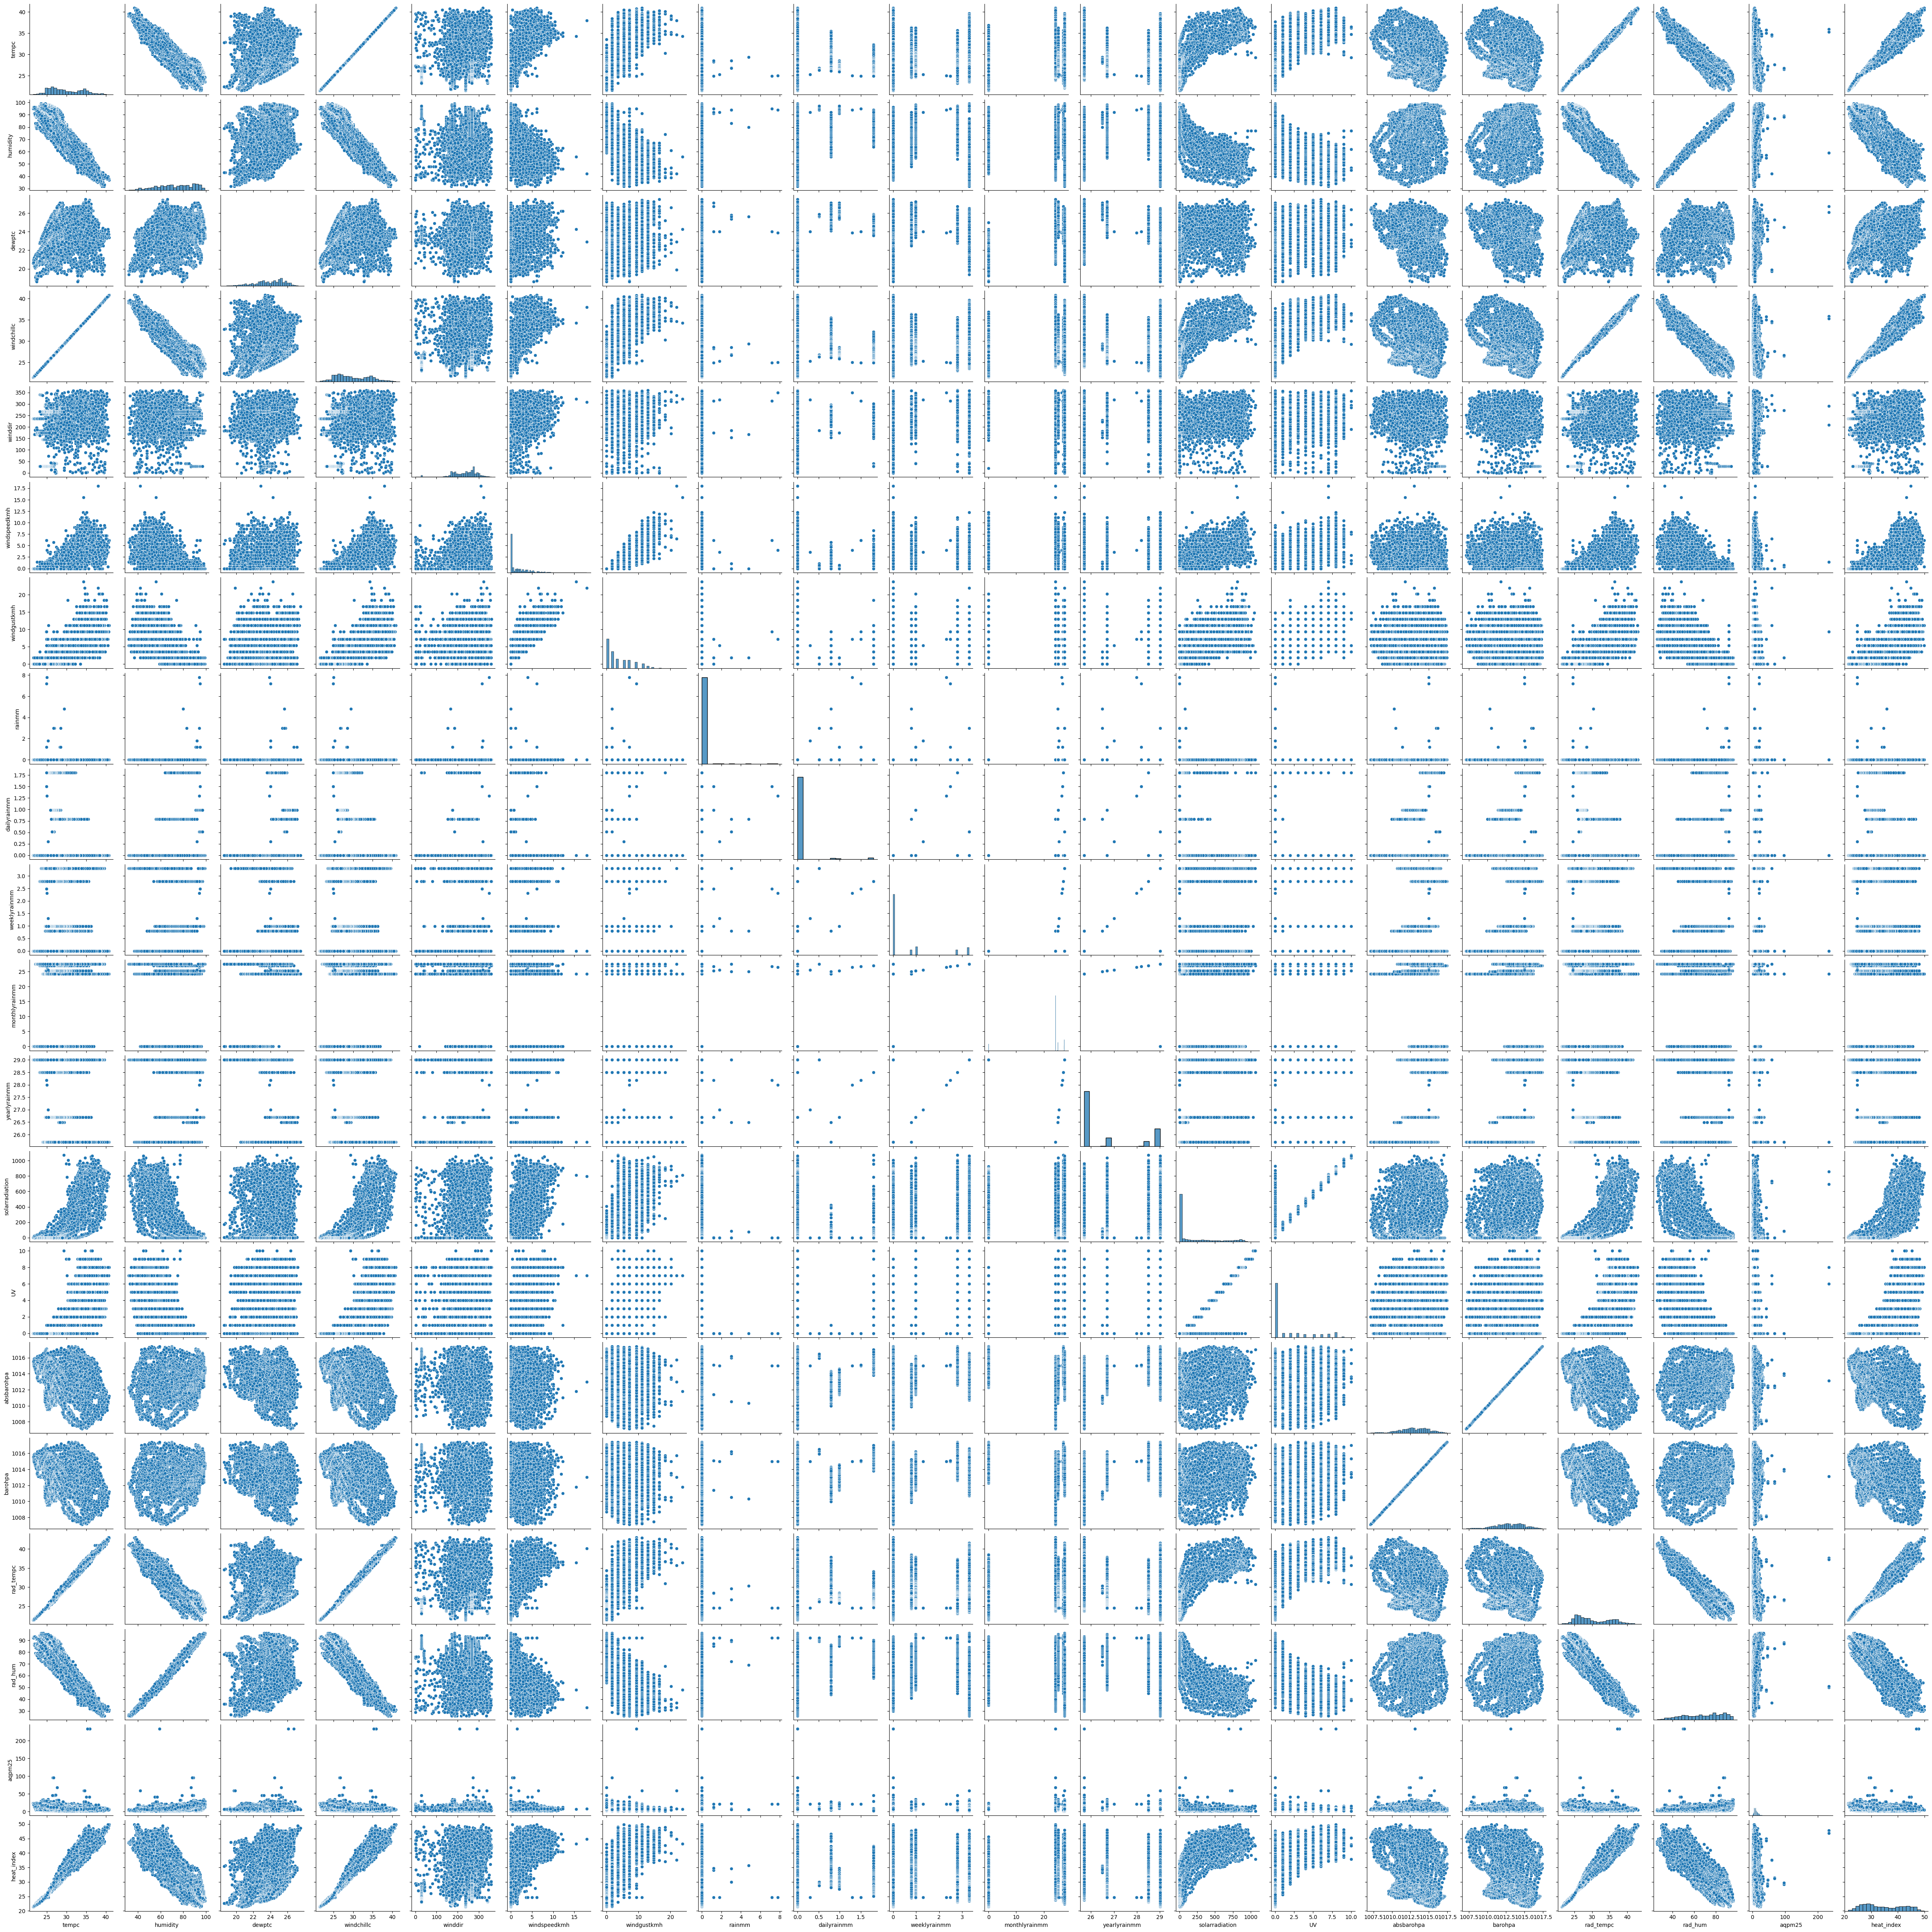

In [62]:
#Pair  - This takes several minutes to run so we can skip this the next time we run everything
#Confirms removal of rain fall measures and wind chill
sns.pairplot(raw_data)

In [92]:
raw_data1 = raw_data.drop(['rainmm', 'dailyrainmm', 'weeklyrainmm', 'monthlyrainmm', 'yearlyrainmm', 'windchillc'], axis=1)
print(raw_data1.head())

   tempc  humidity  dewptc  winddir  windspeedkmh  windgustkmh  \
0  35.11      56.0   25.00    295.0          5.76         9.37   
1  35.50      57.0   25.72    217.0          3.60         7.19   
2  35.50      56.0   25.39    236.0          5.76         9.37   
3  34.61      56.0   24.61    276.0          2.88         7.19   
4  33.78      57.0   24.11    242.0          1.80         7.19   

   solarradiation   UV  absbarohpa  barohpa  rad_tempc  rad_hum  aqpm25  \
0          425.63  0.0     1010.30  1010.30      37.89     44.0     6.0   
1          403.22  0.0     1010.19  1010.19      37.89     47.0     8.0   
2          389.98  0.0     1010.19  1010.19      37.89     47.0     8.0   
3          138.56  0.0     1010.19  1010.19      37.22     45.0     5.0   
4          166.95  0.0     1010.30  1010.30      35.61     50.0     5.0   

   heat_index  
0       45.07  
1       46.62  
2       46.62  
3       43.89  
4       42.16  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


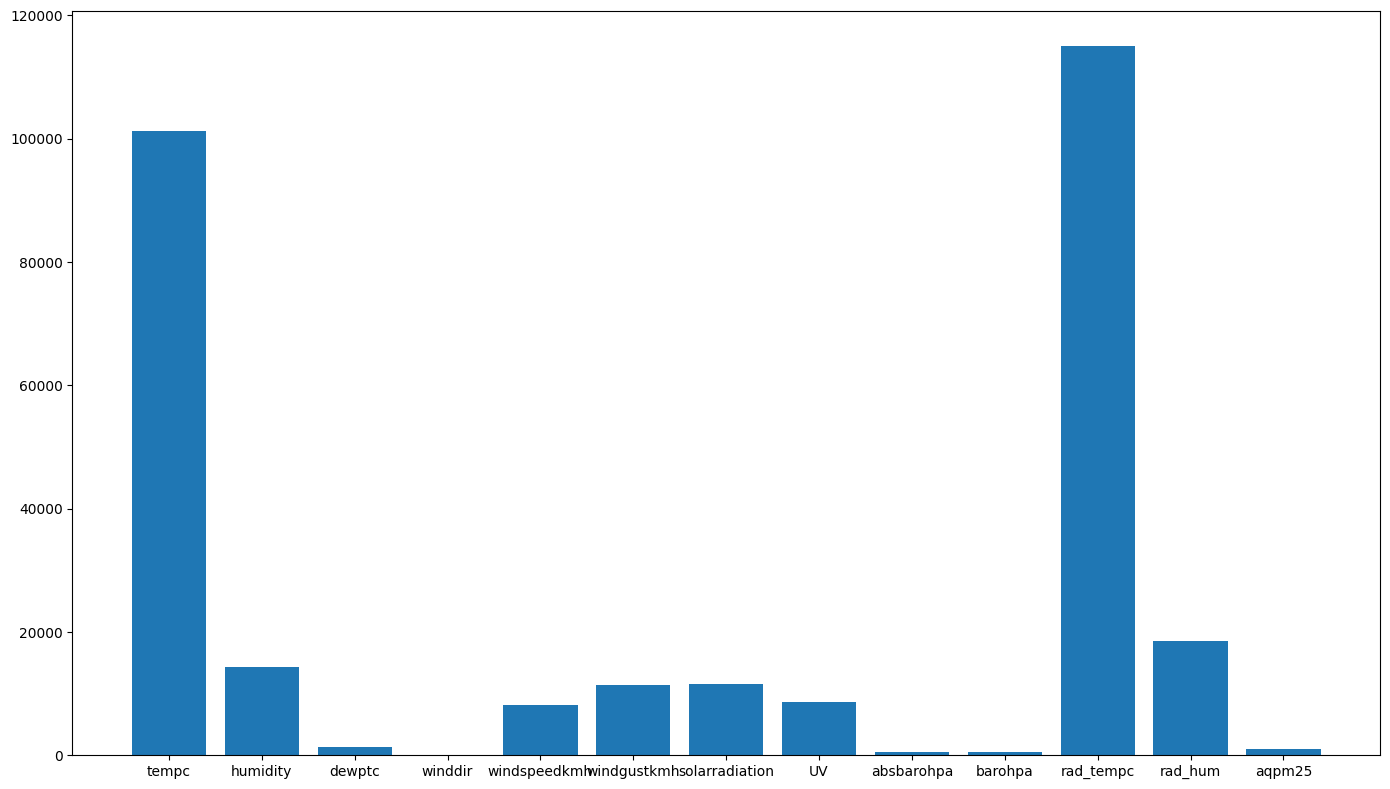

tempc     humidity       dewptc      winddir  windspeedkmh  \
count  6867.000000  6867.000000  6867.000000  6867.000000   6867.000000   
mean     29.809495    72.715596    23.896994   232.584826      1.809157   
std       4.193519    16.091077     1.696682    60.456771      2.384752   
min      21.500000    32.000000    18.610000     0.000000      0.000000   
25%      26.280000    60.000000    22.780000   190.000000      0.000000   
50%      29.000000    74.000000    24.110000   242.000000      0.350000   
75%      33.610000    87.000000    25.280000   274.000000      3.230000   
max      40.890000    99.000000    27.500000   359.000000     17.990000   

       windgustkmh  solarradiation           UV   absbarohpa      barohpa  \
count  6867.000000     6867.000000  6867.000000  6867.000000  6867.000000   
mean      3.833092      206.659962     1.704529  1012.960399  1012.960399   
std       4.141112      295.868866     2.686544     1.963935     1.963935   
min       0.000000        0.000000     0.000000  1007.110000  1007.110000   
25%       0.000000        0.000000     0.000000  1011.620000  1011.620000   
50%       1.800000        3.370000     0.000000  1013.000000  1013.000000   
75%       7.190000      369.860000     3.000000  1014.390000  1014.390000   
max      23.750000     1070.580000    10.000000  1017.410000  1017.410000   

         rad_tempc      rad_hum       aqpm25   heat_index  
count  6867.000000  6867.000000  6867.000000  6867.000000  
mean     30.356019    67.840542    11.248435    34.377554  
std       4.939891    17.625380     7.066289     7.282249  
min      21.390000    26.000000     1.000000    21.390000  
25%      26.220000    53.000000     7.000000    28.090000  
50%      29.000000    70.000000    10.000000    33.160000  
75%      34.890000    84.000000    14.000000    41.060000  
max      43.000000    96.000000   234.000000    49.890000

In [64]:
#Analize the individual predictors and their correlations with the target variable
#Leads to removing absolute barometric pressure, barometric pressure, wind direction, dew point

#the Feature to predict in the dataset, and the Column predictors in the datasets
Feature = ["heat_index"]
Labels = ['tempc', 'humidity', 'dewptc', 'winddir', 'windspeedkmh',
          'windgustkmh', 'solarradiation', 'UV',
          'absbarohpa', 'barohpa', 'rad_tempc', 'rad_hum', 'aqpm25']


plt.figure(figsize=(14,8))
Temp_x=raw_data[Labels]
Temp_y=raw_data[Feature]
selectKbest = SelectKBest(score_func=f_regression, k='all')
Temp_fit = selectKbest.fit(Temp_x,Temp_y)
plt.bar(x=Temp_x.columns,height=Temp_fit.scores_)
plt.tight_layout()
plt.show()

raw_data.describe()

In [93]:
#Removed only the worst features, left else
raw_data2 = raw_data1.drop(['dewptc', 'winddir', 'absbarohpa', 'barohpa','aqpm25'], axis=1)
print(raw_data2.head())

   tempc  humidity  windspeedkmh  windgustkmh  solarradiation   UV  rad_tempc  \
0  35.11      56.0          5.76         9.37          425.63  0.0      37.89   
1  35.50      57.0          3.60         7.19          403.22  0.0      37.89   
2  35.50      56.0          5.76         9.37          389.98  0.0      37.89   
3  34.61      56.0          2.88         7.19          138.56  0.0      37.22   
4  33.78      57.0          1.80         7.19          166.95  0.0      35.61   

   rad_hum  heat_index  
0     44.0       45.07  
1     47.0       46.62  
2     47.0       46.62  
3     45.0       43.89  
4     50.0       42.16  


In [94]:
#Only 4 best features
raw_data3= raw_data2.drop(['windspeedkmh','windgustkmh','solarradiation','UV'], axis=1)
print(raw_data3.head())

   tempc  humidity  rad_tempc  rad_hum  heat_index
0  35.11      56.0      37.89     44.0       45.07
1  35.50      57.0      37.89     47.0       46.62
2  35.50      56.0      37.89     47.0       46.62
3  34.61      56.0      37.22     45.0       43.89
4  33.78      57.0      35.61     50.0       42.16


raw_data --> only has removed identifier columns and indoor data

raw_data1 --> removed uncorrelated features based on heat map and pair plots

raw_data2 --> remove features based on K best features based on lowest scores

raw_data3 --> leaves only 4 best features based on k best